# Capstone projectRestaurant Location recommendation

### Blacksburg map

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
world_map = folium.Map(location=[37.2296,-80.4139], zoom_start=13)
world_map

In [3]:
import pandas as pd

data = {'Place':['Blacksburg', 'Radford', 'Christiansburg'],'Latitude':[37.2296,37.1395,37.1299],'Longitude':[-80.4139,-80.5511,-80.4089],'Label':['#0dd722','#0d5ed7','#f50808']}
place_data = pd.DataFrame(data,columns = ['Place','Latitude','Longitude','Label'])
place_data.head()


,Place,Latitude,Longitude,Label
0,Blacksburg,37.2296,-80.4139,#0dd722
1,Radford,37.1395,-80.5511,#0d5ed7
2,Christiansburg,37.1299,-80.4089,#f50808


In [4]:
# create map of Blacksburg using latitude and longitude values
map_Blacksburg = folium.Map(location=[37.2296,-80.4139], zoom_start=9)

# add markers to map
for lat, lng, place, colab in zip(place_data['Latitude'], place_data['Longitude'], place_data['Place'],place_data['Label']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color=colab,
        fill=True,
        fill_color=colab,
        fill_opacity=0.6,
        parse_html=False).add_to(map_Blacksburg)  
    
map_Blacksburg

## Census Data collection and analysis

In [5]:
import pandas as pd
import numpy as np

In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f11340a0dfd94563858db7fb3b2a5995 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kI6fEaYg7M-f3JBw77gEuMZewlW1u6Z2T2H38VQQDtIk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='Metro_population.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Year,Total Population,Growth,Annual Growth Rate
0,2020,186703,1337.0,0.0072
1,2019,185366,1337.0,0.0072
2,2018,184029,1337.0,0.0073
3,2017,182692,280.0,0.0015
4,2016,182412,1067.0,0.0058


In [7]:
#metro population
metro_pop = df_data_0
headers = ['Year','Total Population', 'Growth', 'Annual Growth Rate']
metro_pop.columns = headers

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [59]:

metro_data =metro_pop[['Year','Total Population']]
metro_data.sort_values(['Year'], ascending=True, axis=0, inplace=True)
md = metro_data.set_index('Year')

md

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Total Population
Year,
2010,178501
2011,178821
2012,179544
2013,180727
2014,181225
2015,181345
2016,182412
2017,182692
2018,184029


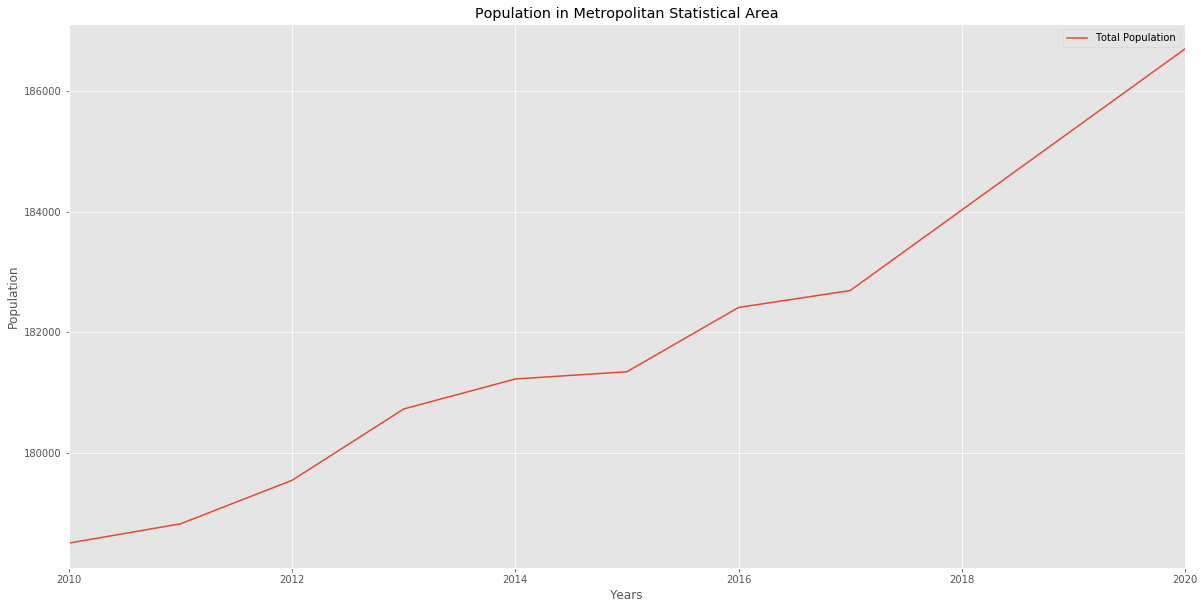

In [61]:
md.index = md.index.map(int)
md.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Population in Metropolitan Statistical Area')
plt.ylabel('Population')
plt.xlabel('Years')

plt.show()

In [14]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f11340a0dfd94563858db7fb3b2a5995 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kI6fEaYg7M-f3JBw77gEuMZewlW1u6Z2T2H38VQQDtIk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='pop_byrace.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Race,Population,Percentage
0,White,34424,77.80
1,Asian,5664,12.80
2,Black or African American,2198,4.97
3,Two or More Races,1046,2.36
4,Some Other Race,644,1.46


In [8]:
#population by race
pop_race = df_data_0
headers = ['Race','Population', 'Percentage']
pop_race.columns = headers
pop_race

,Race,Population,Percentage
0,White,34424,77.80
1,Asian,5664,12.80
2,Black or African American,2198,4.97
3,Two or More Races,1046,2.36
4,Some Other Race,644,1.46
5,American Indian and Alaska Native,240,0.54
6,Native Hawaiian and Other Pacific Islander,29,0.07


In [9]:
pop_race.drop(['Population'],axis = 1, inplace = True)

In [10]:
pop_race

,Race,Percentage
0,White,77.80
1,Asian,12.80
2,Black or African American,4.97
3,Two or More Races,2.36
4,Some Other Race,1.46
5,American Indian and Alaska Native,0.54
6,Native Hawaiian and Other Pacific Islander,0.07


In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


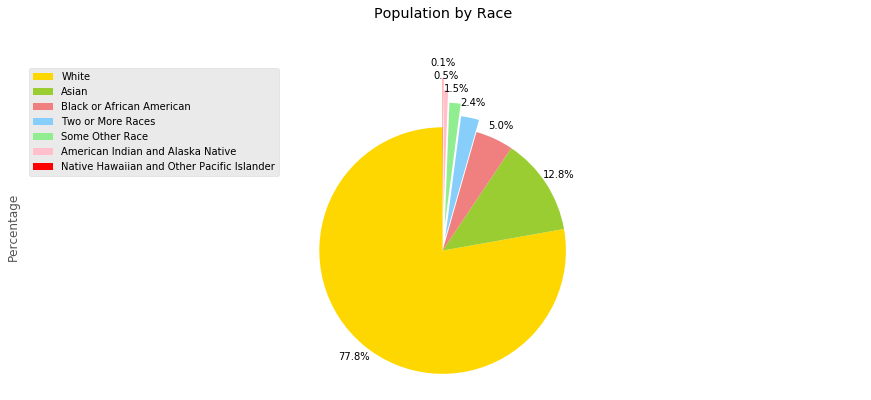

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0, 0, 0, 0.1, 0.2, 0.3, 0.4] # ratio for each continent with which to offset each wedge.

pop_race['Percentage'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Population by Race', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=pop_race['Race'], loc='upper left') 

plt.show()

In [15]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-7a8b66d7-8b71-4ff4-8ded-7e94e7a94590',
    'IBM_API_KEY_ID': 'kI6fEaYg7M-f3JBw77gEuMZewlW1u6Z2T2H38VQQDtIk',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-a2npf7tjq81p7i',
    'FILE': 'pop_age_sex.xlsx'
}

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='pop_age_sex.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Age,Total,Male,Female
0,Under 5 years,1502,827,675
1,5 to 9 years,850,368,482
2,10 to 14 years,1365,635,730
3,15 to 19 years,9581,4796,4785
4,20 to 24 years,14965,9168,5797


In [120]:
df_age = df_data_0 
df_age

,Age,Total,Male,Female
0,Under 5 years,1502,827,675
1,5 to 9 years,850,368,482
2,10 to 14 years,1365,635,730
3,15 to 19 years,9581,4796,4785
4,20 to 24 years,14965,9168,5797
5,25 to 29 years,3942,2058,1884
6,30 to 34 years,2018,1040,978
7,35 to 39 years,1382,749,633
8,40 to 44 years,1461,749,712
9,45 to 49 years,1404,672,732


In [121]:
age = np.arange(0,85,5)

In [122]:
df_age.drop(['Age','Total'],axis = 1,inplace = True)

In [124]:
df_age

,Male,Female
0,827,675
1,368,482
2,635,730
3,4796,4785
4,9168,5797
5,2058,1884
6,1040,978
7,749,633
8,749,712
9,672,732


In [129]:
df_new = pd.DataFrame(age)

In [131]:
df_new.columns = ['Age']

In [133]:
df_new['Male'] = df_age['Male']
df_new['Female'] = df_age['Female']

In [137]:
df = df_new.set_index('Age')
df

,Male,Female
Age,,
0,827,675
5,368,482
10,635,730
15,4796,4785
20,9168,5797
25,2058,1884
30,1040,978
35,749,633
40,749,712


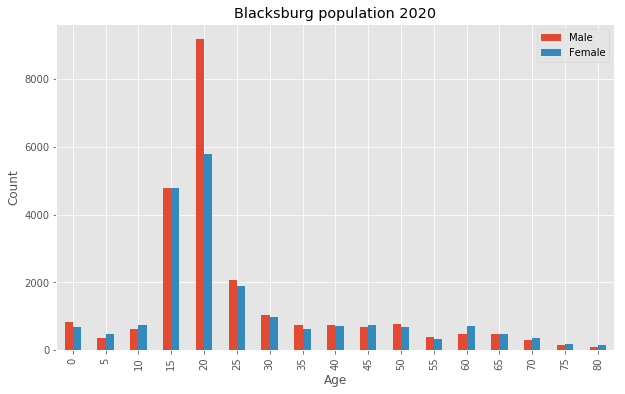

In [139]:
df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Blacksburg population 2020') # add title to the plot

plt.show()

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0


import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

Matplotlib version:  3.0.2


In [24]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-7a8b66d7-8b71-4ff4-8ded-7e94e7a94590',
    'IBM_API_KEY_ID': 'kI6fEaYg7M-f3JBw77gEuMZewlW1u6Z2T2H38VQQDtIk',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-a2npf7tjq81p7i',
    'FILE': 'edu_sex.xlsx'
}

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='edu_sex.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Population 25 years and over,Male,Female
0,Less than 9th grade,69,67
1,9th to 12th grade,303,282
2,High school graduate,701,921
3,"Some college, no degree",777,807
4,Associate's degree,372,355


In [25]:
df_edusex = df_data_0 

In [28]:
df_edusex_plot = df_edusex.set_index('Population 25 years and over')

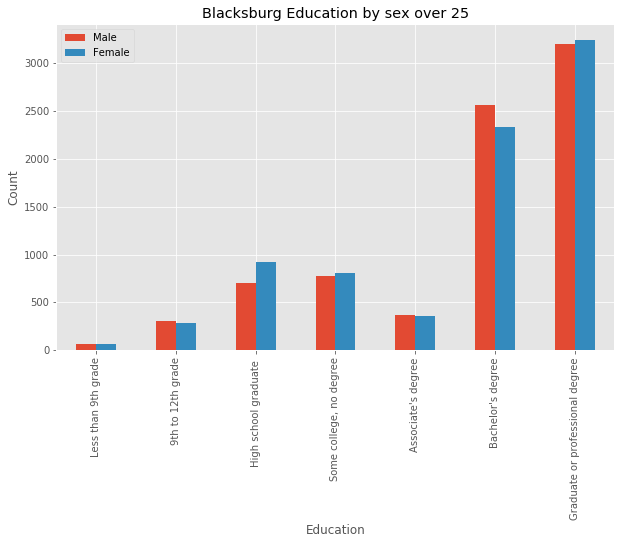

In [31]:
df_edusex_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Education') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Blacksburg Education by sex over 25') # add title to the plot

plt.show()

In [26]:

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='edu_data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_excel(body)
df_data_1.head()


,title,field,percent
0,Less Than 9th Grade,136,0.85
1,9th to 12th Grade,585,3.66
2,High School Graduate,1622,10.15
3,Some College,1584,9.91
4,Associates Degree,727,4.55


In [27]:
df_edu = df_data_1

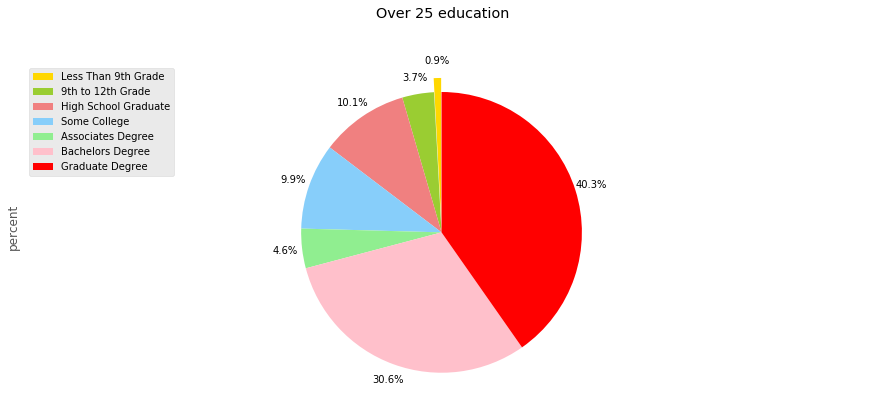

In [33]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0.1, 0, 0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.

df_edu['percent'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Over 25 education', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_edu['title'], loc='upper left') 

plt.show()

In [34]:

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='edurace.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,name,total,High School,Bachelors
0,White,11829,11253,8261
1,Asian,2374,2374,2004
2,Hispanic,619,570,446
3,Black,594,542,328
4,Multiple Races,306,262,189


In [38]:
edu_race = df_data_0.set_index('name')

In [39]:
edu_race.drop(['total','High School'],axis = 1, inplace = True)
edu_race


,Bachelors
name,
White,8261
Asian,2004
Hispanic,446
Black,328
Multiple Races,189
Other Race,162
Native American,30


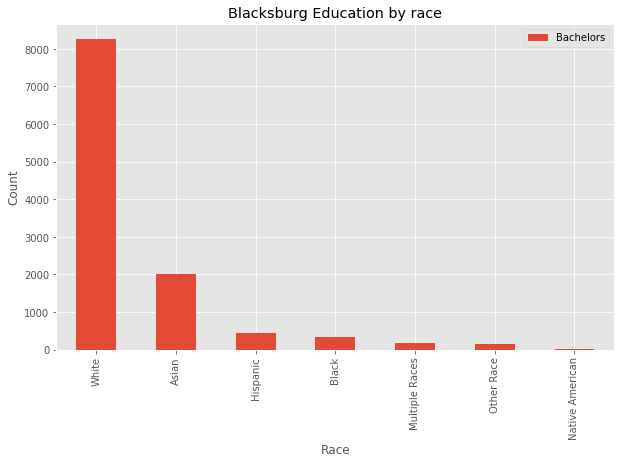

In [41]:
edu_race.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Race') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Blacksburg Education by race') # add title to the plot

plt.show()

In [45]:

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='earnings_education.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,name,All,Male,Female
0,Overall,40699,49606,36640
1,Less Than High School,18072,0,0
2,High School Grad,26786,23750,29779
3,Some College,23190,23785,22922
4,Bachelors Degree,32344,35458,31742


In [56]:
earnings = df_data_0.drop(index = [0,1])

In [57]:
earnings.drop(['All'],axis = 1, inplace = True)

In [58]:
earnings = earnings.set_index('name')

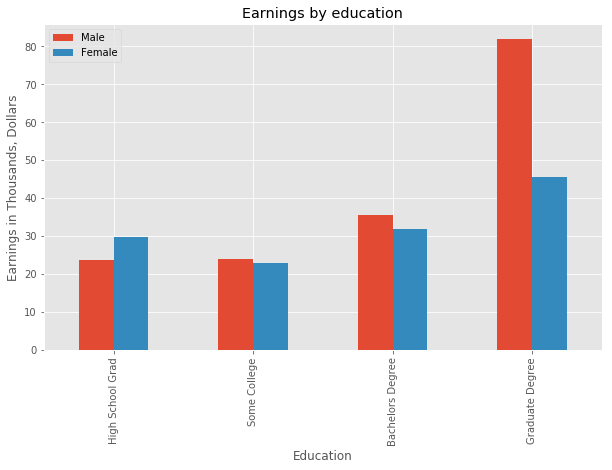

In [59]:
earnings['Male'] = earnings['Male']/1000
earnings['Female'] = earnings['Female']/1000

earnings.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Education') # add to x-label to the plot
plt.ylabel('Earnings in Thousands, Dollars') # add y-label to the plot
plt.title('Earnings by education') # add title to the plot

plt.show()

In [84]:

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='origin_citizen.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Origin,Count
0,Europe,199
1,Asia,804
2,Africa,93
3,Oceania,0
4,Latin America,282


In [86]:
origin_citizen = df_data_0.set_index('Origin')

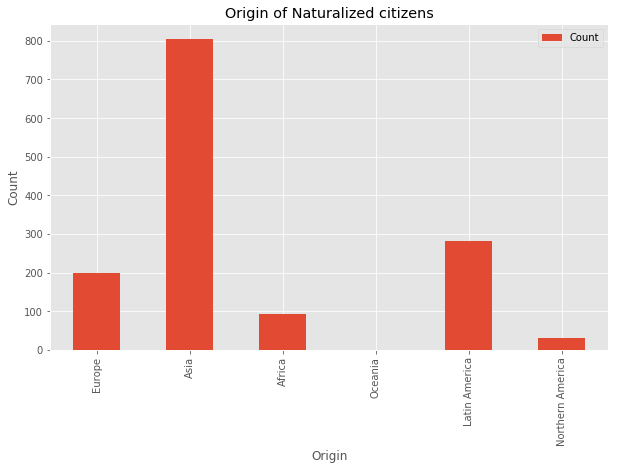

In [87]:


origin_citizen.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Origin') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Origin of Naturalized citizens') # add title to the plot

plt.show()

In [88]:

body = client_f11340a0dfd94563858db7fb3b2a5995.get_object(Bucket='capstoneproject-donotdelete-pr-a2npf7tjq81p7i',Key='origin_noncitizen.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Origin,Count
0,Europe,466
1,Asia,3064
2,Africa,183
3,Oceania,0
4,Latin America,564


In [89]:
origin_noncitizen = df_data_0.set_index('Origin')

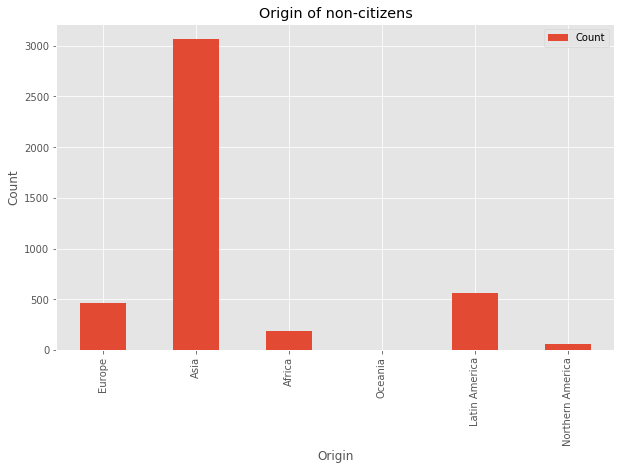

In [90]:

origin_noncitizen.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Origin') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Origin of non-citizens') # add title to the plot

plt.show()

In [91]:
df_origin = origin_citizen
df_origin

,Count
Origin,
Europe,199
Asia,804
Africa,93
Oceania,0
Latin America,282
Northern America,31


In [92]:
df_origin.rename(columns={'Count':'Naturalized-Citizens'},inplace = True)

In [93]:
df_origin

,Naturalized-Citizens
Origin,
Europe,199
Asia,804
Africa,93
Oceania,0
Latin America,282
Northern America,31


In [94]:
df_origin['Count'] = origin_noncitizen['Count']

In [95]:
df_origin

,Naturalized-Citizens,Count
Origin,,
Europe,199,466
Asia,804,3064
Africa,93,183
Oceania,0,0
Latin America,282,564
Northern America,31,63


In [96]:
df_origin.rename(columns={'Count':'Non-Citizens'},inplace = True)

In [97]:
df_origin

,Naturalized-Citizens,Non-Citizens
Origin,,
Europe,199,466
Asia,804,3064
Africa,93,183
Oceania,0,0
Latin America,282,564
Northern America,31,63


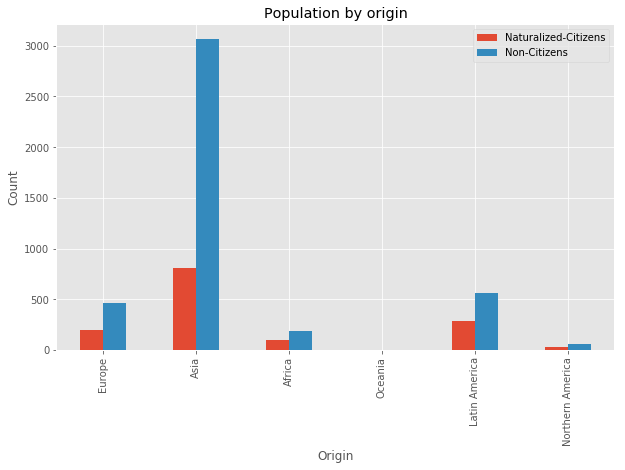

In [98]:

df_origin.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Origin') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Population by origin') # add title to the plot

plt.show()

## Search Asian restaurant in Blacksburg using Foursqaure

In [14]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [8]:
CLIENT_ID = 'T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3' # your Foursquare ID
CLIENT_SECRET = 'CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3
CLIENT_SECRET:CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW


In [9]:
address = 'Blacksburg, Virginia'


latitude = 37.2296
longitude = -80.4139
print(latitude, longitude)


37.2296 -80.4139


In [10]:
search_query = 'Asian Restaurant'
radius = 6000
print(search_query + ' .... OK!')
LIMIT = 100

Asian Restaurant .... OK!


In [11]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3&client_secret=CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW&ll=37.2296,-80.4139&v=20180604&query=Asian Restaurant&radius=6000&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f01dd248e7ad76092d6cbba'},
 'response': {'venues': [{'id': '5b2ae7ae898bdc002c8e82d3',
    'name': 'Blacksburg No. 1 Restaurant',
    'location': {'address': '125 N Main St Ste 400',
     'crossStreet': 'Roanoke St E',
     'lat': 37.22968673706055,
     'lng': -80.41472625732422,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.22968673706055,
       'lng': -80.41472625732422}],
     'distance': 73,
     'postalCode': '24060',
     'cc': 'US',
     'city': 'Blacksburg',
     'state': 'VA',
     'country': 'United States',
     'formattedAddress': ['125 N Main St Ste 400 (Roanoke St E)',
      'Blacksburg, VA 24060',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1d1941735',
      'name': 'Noodle House',
      'pluralName': 'Noodle Houses',
      'shortName': 'Noodles',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/ramen_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 

In [16]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",NaN,NaN,NaN,NaN,NaN,NaN,False,5b2ae7ae898bdc002c8e82d3,125 N Main St Ste 400,...,73,"[125 N Main St Ste 400 (Roanoke St E), Blacksb...","[{'label': 'display', 'lat': 37.22968673706055...",37.229687,-80.414726,24060,VA,Blacksburg No. 1 Restaurant,v-1593957860,NaN
1,"[{'id': '4bf58dd8d48988d17a941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b2b00d9f964a5208db324e3,205 N Main St,...,108,"[205 N Main St (at Jackson St.), Blacksburg, V...","[{'label': 'display', 'lat': 37.23008846624786...",37.230088,-80.414964,24060,VA,Boudreaux's,v-1593957860,NaN
2,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b095b8bf964a5201e1623e3,153 College Ave,...,202,"[153 College Ave (at Draper Rd), Blacksburg, V...","[{'label': 'display', 'lat': 37.22992685627556...",37.229927,-80.416150,24060,VA,Gillie's,v-1593957860,NaN
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,5325d7a2498e4b47fd3eb9d0,NaN,...,1511,"[Blacksburg, VA, United States]","[{'label': 'display', 'lat': 37.219008, 'lng':...",37.219008,-80.403226,NaN,VA,Asian Grill Buffet,v-1593957860,NaN
4,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,False,4bbcc84c8ec3d13a6c391b28,217 N Main St,...,166,"[217 N Main St, Blacksburg, VA 24060, United S...","[{'label': 'display', 'lat': 37.230148, 'lng':...",37.230148,-80.415645,24060,VA,Hokie Hair,v-1593957860,NaN


In [17]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Blacksburg No. 1 Restaurant,Noodle House,125 N Main St Ste 400,US,Blacksburg,United States,Roanoke St E,73,"[125 N Main St Ste 400 (Roanoke St E), Blacksb...","[{'label': 'display', 'lat': 37.22968673706055...",37.229687,-80.414726,24060,VA,5b2ae7ae898bdc002c8e82d3
1,Boudreaux's,Cajun / Creole Restaurant,205 N Main St,US,Blacksburg,United States,at Jackson St.,108,"[205 N Main St (at Jackson St.), Blacksburg, V...","[{'label': 'display', 'lat': 37.23008846624786...",37.230088,-80.414964,24060,VA,4b2b00d9f964a5208db324e3
2,Gillie's,Vegetarian / Vegan Restaurant,153 College Ave,US,Blacksburg,United States,at Draper Rd,202,"[153 College Ave (at Draper Rd), Blacksburg, V...","[{'label': 'display', 'lat': 37.22992685627556...",37.229927,-80.416150,24060,VA,4b095b8bf964a5201e1623e3
3,Asian Grill Buffet,Chinese Restaurant,NaN,US,Blacksburg,United States,NaN,1511,"[Blacksburg, VA, United States]","[{'label': 'display', 'lat': 37.219008, 'lng':...",37.219008,-80.403226,NaN,VA,5325d7a2498e4b47fd3eb9d0
4,Hokie Hair,Salon / Barbershop,217 N Main St,US,Blacksburg,United States,NaN,166,"[217 N Main St, Blacksburg, VA 24060, United S...","[{'label': 'display', 'lat': 37.230148, 'lng':...",37.230148,-80.415645,24060,VA,4bbcc84c8ec3d13a6c391b28
5,Preston's Restaurant,Restaurant,901 Prices Fork Rd,US,Blacksburg,United States,University City BLVD,1417,"[901 Prices Fork Rd (University City BLVD), Bl...","[{'label': 'display', 'lat': 37.22982331576831...",37.229823,-80.429895,24061,VA,4f08cc0ae4b039f5ad5b205f
6,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,2111 South Main Street,US,Blacksburg,United States,NaN,3216,"[2111 South Main Street, Blacksburg, VA 24060,...","[{'label': 'display', 'lat': 37.20339999999999...",37.203400,-80.398600,24060,VA,4b5e7f49f964a520e79029e3
7,Poor Billy's,Seafood Restaurant,201 N Main St,US,Blacksburg,United States,at Jackson St.,86,"[201 N Main St (at Jackson St.), Blacksburg, V...","[{'label': 'display', 'lat': 37.22994620531836...",37.229946,-80.414774,24060,VA,4b2b0199f964a5209bb324e3
8,Abby's Restaurant & Bar,American Restaurant,1001 N Main St,US,Blacksburg,United States,at Montgomery St.,1174,"[1001 N Main St (at Montgomery St.), Blacksbur...","[{'label': 'display', 'lat': 37.23875926999905...",37.238759,-80.420482,24060,VA,4b55eea2f964a52041f727e3
9,The Palisades Restaurant,None,NaN,US,"Blacksburg, VA, US",United States,NaN,883,"[Blacksburg, VA, US, NC, United States]","[{'label': 'display', 'lat': 37.2291168, 'lng'...",37.229117,-80.423853,NaN,NC,52c3773911d2590feff76ae2


In [18]:
df = dataframe_filtered['categories'].value_counts().rename_axis('categories').to_frame('counts')


In [19]:
df

,counts
categories,
Italian Restaurant,3
Chinese Restaurant,2
Bar,2
Sandwich Place,1
Vegetarian / Vegan Restaurant,1
Mexican Restaurant,1
Japanese Restaurant,1
Food,1
Indian Restaurant,1


In [21]:

import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


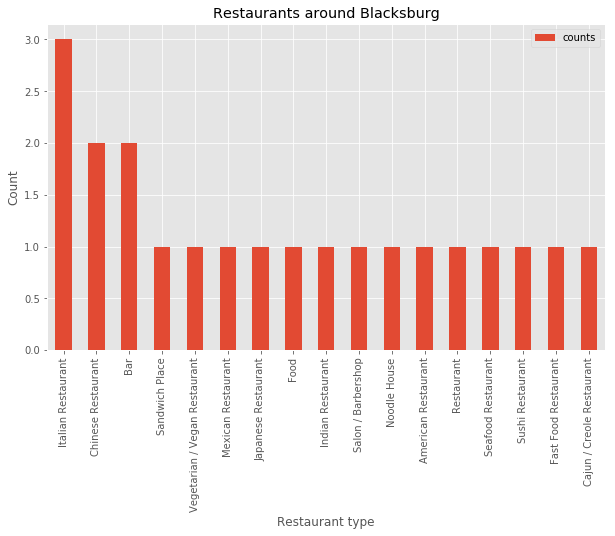

In [22]:
df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Restaurant type') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Restaurants around Blacksburg') # add title to the plot

plt.show()

In [23]:
dataframe_filtered[['name','categories']]

,name,categories
0,Blacksburg No. 1 Restaurant,Noodle House
1,Boudreaux's,Cajun / Creole Restaurant
2,Gillie's,Vegetarian / Vegan Restaurant
3,Asian Grill Buffet,Chinese Restaurant
4,Hokie Hair,Salon / Barbershop
5,Preston's Restaurant,Restaurant
6,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant
7,Poor Billy's,Seafood Restaurant
8,Abby's Restaurant & Bar,American Restaurant
9,The Palisades Restaurant,None


In [24]:
dataframe_filtered.name

0               Blacksburg No. 1 Restaurant
1                               Boudreaux's
2                                  Gillie's
3                        Asian Grill Buffet
4                                Hokie Hair
5                      Preston's Restaurant
6     Bojangles' Famous Chicken 'n Biscuits
7                              Poor Billy's
8                   Abby's Restaurant & Bar
9                  The Palisades Restaurant
10                               The Cellar
11           The Gobbler Italian Restaurant
12         Zeppoli's Restaurant & Wine Shop
13                             India Garden
14           El Mariachi Mexican Restaurant
15              Napoli's Italian Restaurant
16                Macado's Restaurant & Bar
17                    Avelllinos Restaurant
18                               Hunan King
19                              Hokie House
20                               Sake House
21                 Japanese Restaurant Kayo
Name: name, dtype: object

In [25]:
#get lat long of indian restaurant
lat_indian= dataframe_filtered.loc[16,'lat']
long_indian= dataframe_filtered.loc[16,'lng']
print('indian restaurant location',lat_indian, long_indian)



indian restaurant location 37.236391614949774 -80.43402983559996


In [26]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map of Blacksburg

# add a red circle marker to represent Blacksburg
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    if(lat!=lat_indian and lng!=long_indian):
        folium.features.CircleMarker([lat, lng], radius=5, color='blue', popup=label, fill = True, fill_color='blue', fill_opacity=0.6).add_to(venues_map)
    else:
        folium.features.CircleMarker([lat, lng], radius=5, color='black', popup=label, fill = True, fill_color='black', fill_opacity=0.6).add_to(venues_map)

# display map
venues_map

## Explore the venue India Garden using Foursquare

In [27]:
#get venue_id of indian garden
venue_id = dataframe_filtered.loc[16,'id']
print('venue_id of indian restaurant',venue_id)

venue_id of indian restaurant 4b47745bf964a5209a3226e3


In [151]:
#explore indian garden

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4b3a9851f964a520ad6a25e3?client_id=T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3&client_secret=CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW&v=20180604'

In [152]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4b3a9851f964a520ad6a25e3',
 'name': 'India Garden',
 'contact': {'phone': '5409515100', 'formattedPhone': '(540) 951-5100'},
 'location': {'address': '210 Prices Fork Rd',
  'crossStreet': 'at North Main St.',
  'lat': 37.23455692390781,
  'lng': -80.42149367557087,
  'labeledLatLngs': [{'label': 'display',
    'lat': 37.23455692390781,
    'lng': -80.42149367557087}],
  'postalCode': '24060',
  'cc': 'US',
  'city': 'Blacksburg',
  'state': 'VA',
  'country': 'United States',
  'formattedAddress': ['210 Prices Fork Rd (at North Main St.)',
   'Blacksburg, VA 24060',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/india-garden/4b3a9851f964a520ad6a25e3',
 'categories': [{'id': '4bf58dd8d48988d10f941735',
   'name': 'Indian Restaurant',
   'pluralName': 'Indian Restaurants',
   'shortName': 'Indian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 

### India Garden rating

In [154]:
try:
    print('The rating of this restaurant is',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The rating of this restaurant is 7.0


In [158]:
#get tips
print('Number of tips for this restaurant:',result['response']['venue']['tips']['count'])

Number of tips for this restaurant: 5


In [159]:
## Ecco Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f008acb3f71e168d2f73fc3'},
 'response': {'tips': {'count': 5,
   'items': [{'id': '54502fe1498efdfe4b369156',
     'createdAt': 1414541281,
     'text': 'Lunch buffet is always delicious. Their chai is also really good but takes some time for them to prepare so put your order in sooner rather than later.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/54502fe1498efdfe4b369156',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 1,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '11135482',
      'firstName': 'Lauren',
      'lastName': 'B',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/DCB1ZMHNM3S1232S.jpg'}},
     'authorInteractionType': 'liked'}]}}}

In [160]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

### India Garden, get tips from Foursquare

In [163]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered.head(10)

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,Lunch buffet is always delicious. Their chai is also really good but takes some time for them to prepare so put your order in sooner rather than later.,1,0,54502fe1498efdfe4b369156,Lauren,B,11135482


In [166]:
#Explore near Indian Garden
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_indian, long_indian, VERSION, 50, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3&client_secret=CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW&ll=37.23455692390781,-80.42149367557087&v=20180604&radius=50&limit=100'

In [167]:
import requests

In [169]:
results = requests.get(url).json()
'There are {} around Indian Garden restaurant.'.format(len(results['response']['groups'][0]['items']))

'There are 5 around Indian Garden restaurant.'

In [170]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b3a9851f964a520ad6a25e3',
  'name': 'India Garden',
  'location': {'address': '210 Prices Fork Rd',
   'crossStreet': 'at North Main St.',
   'lat': 37.23455692390781,
   'lng': -80.42149367557087,
   'labeledLatLngs': [{'label': 'display',
     'lat': 37.23455692390781,
     'lng': -80.42149367557087}],
   'distance': 0,
   'postalCode': '24060',
   'cc': 'US',
   'city': 'Blacksburg',
   'state': 'VA',
   'country': 'United States',
   'formattedAddress': ['210 Prices Fork Rd (at North Main St.)',
    'Blacksburg, VA 24060',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d10f941735',
    'name': 'Indian Restaurant',
    'pluralName': 'Indian Restaurants',
    'shortName': 'Indian',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
     'suffix': '.png'},
    'primary': True}],
  'd

In [171]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,India Garden,Indian Restaurant,210 Prices Fork Rd,US,Blacksburg,United States,at North Main St.,0,"[210 Prices Fork Rd (at North Main St.), Blacksburg, VA 24060, United States]","[{'label': 'display', 'lat': 37.23455692390781, 'lng': -80.42149367557087}]",37.234557,-80.421494,24060,VA,4b3a9851f964a520ad6a25e3
1,One Stop Convenience Store,Convenience Store,Prices Fork Road,US,Blacksburg,United States,NaN,33,"[Prices Fork Road, Blacksburg, VA, United States]","[{'label': 'display', 'lat': 37.234687, 'lng': -80.421838}]",37.234687,-80.421838,NaN,VA,4e97a2796c25f5286024e45c
2,Benny Marzano's,Pizza Place,210 Prices Fork Rd,US,Blacksburg,United States,NaN,24,"[210 Prices Fork Rd, Blacksburg, VA 24060, United States]","[{'label': 'display', 'lat': 37.23477321760452, 'lng': -80.42144039362597}]",37.234773,-80.421440,24060,VA,504baf1fe4b0c4f4a3f04329
3,Spicity,Chinese Restaurant,210 Prices Fork Rd,US,Blacksburg,United States,North Main Street,28,"[210 Prices Fork Rd (North Main Street), Blacksburg, VA 24060, United States]","[{'label': 'display', 'lat': 37.234604, 'lng': -80.421806}]",37.234604,-80.421806,24060,VA,5b954a0a724750002c5a35f9
4,Best Wishes Flowers & Gifts,Flower Shop,880 University City Blvd Ste C,US,Blacksburg,United States,NaN,41,"[880 University City Blvd Ste C, Blacksburg, VA 24060, United States]","[{'label': 'display', 'lat': 37.234654991156134, 'lng': -80.42194426059721}]",37.234655,-80.421944,24060,VA,4cffd9c91fcef04d7b8ac7b9


### India Garden location

In [175]:
venues_map = folium.Map(location=[lat_indian, long_indian], zoom_start=15) # generate map centred around Indian Garden


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [lat_indian, long_indian],
    radius=10,
    popup='Indian garden',
    fill=True,
    color='black',
    fill_color='black',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Explore other neighborhoods near Blacksburg and collect data

In [28]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [29]:
neighborhoods

,Neighborhood,Latitude,Longitude


In [30]:
#blacksburg data
neighborhoodlist = ['Blacksburg','Christensburg','Prices Fork','Radford','Roanoke','Wytheville','Lynchburg','Pulaski', 'Salem']

In [31]:

for n in neighborhoodlist: 
    address = n + ',WV'
    print(address)
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinates are {}, {}.'.format(latitude, longitude))
    except:
        location = geolocator.geocode(address)
        latitude = 0
        longitude = 0
    neighborhoods = neighborhoods.append({'Neighborhood': n,
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)

    

Blacksburg,WV
The geograpical coordinates are 39.3531554, -78.7524612.
Christensburg,WV
Prices Fork,WV
The geograpical coordinates are 38.3319069, -82.3961091.
Radford,WV
Roanoke,WV
The geograpical coordinates are 38.9317629, -80.4928679.
Wytheville,WV
Lynchburg,WV
The geograpical coordinates are 39.6217482, -80.0947925.
Pulaski,WV
The geograpical coordinates are 40.0339619, -80.7256376.
Salem,WV
The geograpical coordinates are 39.2828653, -80.5589856.


In [32]:
neighborhoods

,Neighborhood,Latitude,Longitude
0,Blacksburg,39.353155,-78.752461
1,Christensburg,0.000000,0.000000
2,Prices Fork,38.331907,-82.396109
3,Radford,0.000000,0.000000
4,Roanoke,38.931763,-80.492868
5,Wytheville,0.000000,0.000000
6,Lynchburg,39.621748,-80.094792
7,Pulaski,40.033962,-80.725638
8,Salem,39.282865,-80.558986


In [33]:
neighborhoods.ix[1,'Latitude'] = 37.1299
neighborhoods.ix[1,'Longitude'] = -80.4089

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [34]:
neighborhoods.ix[0,'Latitude'] = 37.2296
neighborhoods.ix[0,'Longitude'] = -80.4139

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [35]:
neighborhoods.ix[2,'Latitude'] = 37.2097
neighborhoods.ix[2,'Longitude'] = -80.4903

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [36]:
neighborhoods.ix[3,'Latitude'] = 37.1318
neighborhoods.ix[3,'Longitude'] = -80.5764
neighborhoods.ix[4,'Latitude'] = 37.2710
neighborhoods.ix[4,'Longitude'] = -79.9414
neighborhoods.ix[5,'Latitude'] = 36.9485
neighborhoods.ix[5,'Longitude'] = -81.0848
neighborhoods.ix[6,'Latitude'] = 37.4138
neighborhoods.ix[6,'Longitude'] = -79.1422
neighborhoods.ix[7,'Latitude'] = 37.0479
neighborhoods.ix[7,'Longitude'] = -80.7798
neighborhoods.ix[8,'Latitude'] = 37.2935
neighborhoods.ix[8,'Longitude'] = -80.0548

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_i

In [37]:
neighborhoods


,Neighborhood,Latitude,Longitude
0,Blacksburg,37.2296,-80.4139
1,Christensburg,37.1299,-80.4089
2,Prices Fork,37.2097,-80.4903
3,Radford,37.1318,-80.5764
4,Roanoke,37.2710,-79.9414
5,Wytheville,36.9485,-81.0848
6,Lynchburg,37.4138,-79.1422
7,Pulaski,37.0479,-80.7798
8,Salem,37.2935,-80.0548


In [38]:
CLIENT_ID = 'T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3' # your Foursquare ID
CLIENT_SECRET = 'CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3
CLIENT_SECRET:CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW


### Get nearby venues

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
Blacksburg_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Blacksburg
Christensburg
Prices Fork
Radford
Roanoke
Wytheville
Lynchburg
Pulaski
Salem


In [42]:
print(Blacksburg_venues.shape)
Blacksburg_venues.head(210)

(205, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Blacksburg,37.2296,-80.4139,The Cellar,37.230874,-80.415093,Bar
1,Blacksburg,37.2296,-80.4139,Souvlaki,37.229885,-80.416262,Greek Restaurant
2,Blacksburg,37.2296,-80.4139,Blacksburg Farmer's Market,37.229195,-80.414777,Farmers Market
3,Blacksburg,37.2296,-80.4139,The Lyric Theatre,37.230302,-80.415751,Indie Movie Theater
4,Blacksburg,37.2296,-80.4139,Benny Marzano's,37.229382,-80.415313,Pizza Place
5,Blacksburg,37.2296,-80.4139,Gillie's,37.229927,-80.416150,Vegetarian / Vegan Restaurant
6,Blacksburg,37.2296,-80.4139,Cabo Fish Taco,37.228750,-80.413238,Mexican Restaurant
7,Blacksburg,37.2296,-80.4139,Campus Emporium,37.230260,-80.414877,Clothing Store
8,Blacksburg,37.2296,-80.4139,Idego Coffee,37.229377,-80.414401,Café
9,Blacksburg,37.2296,-80.4139,Joe's Diner,37.230486,-80.415156,Diner


In [50]:
Blacksburg_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Blacksburg,53,53,53,53,53,53
Christensburg,14,14,14,14,14,14
Lynchburg,29,29,29,29,29,29
Prices Fork,2,2,2,2,2,2
Pulaski,6,6,6,6,6,6
Radford,6,6,6,6,6,6
Roanoke,67,67,67,67,67,67
Salem,19,19,19,19,19,19
Wytheville,9,9,9,9,9,9


In [51]:
print('There are {} uniques categories.'.format(len(Blacksburg_venues['Venue Category'].unique())))

There are 97 uniques categories.


In [81]:
# one hot encoding
Blacksburg_onehot = pd.get_dummies(Blacksburg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Blacksburg_onehot['Neighborhood'] = Blacksburg_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Blacksburg_onehot.columns[-1]] + list(Blacksburg_onehot.columns[:-1])
Blacksburg_onehot = Blacksburg_onehot[fixed_columns]

Blacksburg_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Art Museum,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bike Rental / Bike Share,...,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Wings Joint
0,Blacksburg,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Blacksburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Blacksburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Blacksburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Blacksburg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
Blacksburg_onehot.shape

(205, 98)

In [54]:
Blacksburg_grouped = Blacksburg_onehot.groupby('Neighborhood').mean().reset_index()
Blacksburg_grouped

,Neighborhood,American Restaurant,Antique Shop,Art Museum,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Bike Rental / Bike Share,...,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Wings Joint
0,Blacksburg,0.018868,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,0.075472,0.000000,...,0.000000,0.000000,0.000000,0.018868,0.018868,0.000000,0.018868,0.000000,0.018868,0.000000
1,Christensburg,0.142857,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Lynchburg,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.034483,0.034483,0.034483,0.000000,0.034483,0.034483,0.000000,0.000000,0.000000,0.000000
3,Prices Fork,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Pulaski,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Radford,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Roanoke,0.074627,0.000000,0.014925,0.014925,0.000000,0.014925,0.000000,0.029851,0.000000,...,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000
7,Salem,0.105263,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632
8,Wytheville,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
Blacksburg_grouped.shape

(9, 98)

### Get top 10 venues

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [97]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Blacksburg_grouped['Neighborhood']

for ind in np.arange(Blacksburg_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Blacksburg_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Blacksburg,Pizza Place,Bar,Mexican Restaurant,Café,Chinese Restaurant,Pub,Coffee Shop,Gourmet Shop,Men's Store,Market
1,Christensburg,American Restaurant,Fast Food Restaurant,Pizza Place,Dance Studio,Bakery,Bank,Optical Shop,Chinese Restaurant,Liquor Store,Sandwich Place
2,Lynchburg,American Restaurant,Pizza Place,Diner,Hotel,Trail,Bar,New American Restaurant,Liquor Store,Photography Studio,Dessert Shop
3,Prices Fork,Flea Market,Brewery,Wings Joint,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Farmers Market
4,Pulaski,American Restaurant,Italian Restaurant,Discount Store,Food,Bike Rental / Bike Share,Boutique,Greek Restaurant,Gym,Deli / Bodega,Dessert Shop
5,Radford,History Museum,Spa,Italian Restaurant,Music Venue,Fast Food Restaurant,Pizza Place,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega
6,Roanoke,American Restaurant,Sandwich Place,Restaurant,Bar,Bus Station,Café,Coffee Shop,Diner,Farmers Market,Lounge
7,Salem,American Restaurant,Ice Cream Shop,Pizza Place,Sandwich Place,Antique Shop,Brewery,Coffee Shop,Cosmetics Shop,Deli / Bodega,Farmers Market
8,Wytheville,Hotel,Post Office,Grocery Store,History Museum,Hot Dog Joint,Italian Restaurant,Liquor Store,Park,American Restaurant,Taco Place


## Clustering of venues using kmeans method. 

In [62]:
# import k-means from clustering stage
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt


In [60]:
Blacksburg_grouped_clustering = Blacksburg_grouped.drop('Neighborhood', 1)



In [67]:

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Blacksburg_grouped_clustering) 
    kmeanModel.fit(Blacksburg_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(Blacksburg_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Blacksburg_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Blacksburg_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Blacksburg_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_

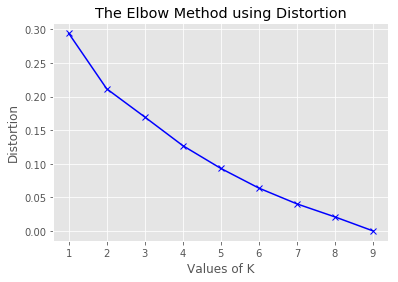

In [68]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

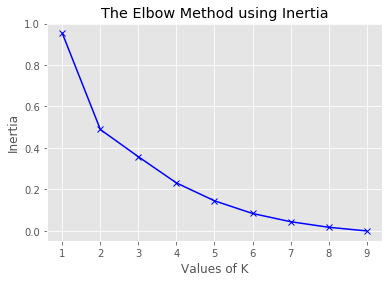

In [65]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [95]:
# set number of clusters
kclusters = 6

#Blacksburg_grouped_clustering = Blacksburg_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Blacksburg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]



array([0, 5, 0, 2, 4, 1, 0, 0, 3], dtype=int32)

In [98]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Blacksburg_merged = neighborhoods



### Clustered data result

In [99]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Blacksburg_merged = Blacksburg_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Blacksburg_merged.head(100) # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Blacksburg,37.2296,-80.4139,0,Pizza Place,Bar,Mexican Restaurant,Café,Chinese Restaurant,Pub,Coffee Shop,Gourmet Shop,Men's Store,Market
1,Christensburg,37.1299,-80.4089,5,American Restaurant,Fast Food Restaurant,Pizza Place,Dance Studio,Bakery,Bank,Optical Shop,Chinese Restaurant,Liquor Store,Sandwich Place
2,Prices Fork,37.2097,-80.4903,2,Flea Market,Brewery,Wings Joint,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Farmers Market
3,Radford,37.1318,-80.5764,1,History Museum,Spa,Italian Restaurant,Music Venue,Fast Food Restaurant,Pizza Place,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega
4,Roanoke,37.2710,-79.9414,0,American Restaurant,Sandwich Place,Restaurant,Bar,Bus Station,Café,Coffee Shop,Diner,Farmers Market,Lounge
5,Wytheville,36.9485,-81.0848,3,Hotel,Post Office,Grocery Store,History Museum,Hot Dog Joint,Italian Restaurant,Liquor Store,Park,American Restaurant,Taco Place
6,Lynchburg,37.4138,-79.1422,0,American Restaurant,Pizza Place,Diner,Hotel,Trail,Bar,New American Restaurant,Liquor Store,Photography Studio,Dessert Shop
7,Pulaski,37.0479,-80.7798,4,American Restaurant,Italian Restaurant,Discount Store,Food,Bike Rental / Bike Share,Boutique,Greek Restaurant,Gym,Deli / Bodega,Dessert Shop
8,Salem,37.2935,-80.0548,0,American Restaurant,Ice Cream Shop,Pizza Place,Sandwich Place,Antique Shop,Brewery,Coffee Shop,Cosmetics Shop,Deli / Bodega,Farmers Market


In [100]:
Blacksburg_merged.loc[Blacksburg_merged['Cluster Labels'] == 0, Blacksburg_merged.columns[[1] + list(range(5, Blacksburg_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,37.2296,Bar,Mexican Restaurant,Café,Chinese Restaurant,Pub,Coffee Shop,Gourmet Shop,Men's Store,Market
4,37.2710,Sandwich Place,Restaurant,Bar,Bus Station,Café,Coffee Shop,Diner,Farmers Market,Lounge
6,37.4138,Pizza Place,Diner,Hotel,Trail,Bar,New American Restaurant,Liquor Store,Photography Studio,Dessert Shop
8,37.2935,Ice Cream Shop,Pizza Place,Sandwich Place,Antique Shop,Brewery,Coffee Shop,Cosmetics Shop,Deli / Bodega,Farmers Market


In [101]:
Blacksburg_merged.loc[Blacksburg_merged['Cluster Labels'] == 1, Blacksburg_merged.columns[[1] + list(range(5, Blacksburg_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,37.1318,Spa,Italian Restaurant,Music Venue,Fast Food Restaurant,Pizza Place,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega


In [102]:
Blacksburg_merged.loc[Blacksburg_merged['Cluster Labels'] == 2, Blacksburg_merged.columns[[1] + list(range(5, Blacksburg_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,37.2097,Brewery,Wings Joint,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Farmers Market


In [103]:
Blacksburg_merged.loc[Blacksburg_merged['Cluster Labels'] == 3, Blacksburg_merged.columns[[1] + list(range(5, Blacksburg_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,36.9485,Post Office,Grocery Store,History Museum,Hot Dog Joint,Italian Restaurant,Liquor Store,Park,American Restaurant,Taco Place


In [104]:
Blacksburg_merged.loc[Blacksburg_merged['Cluster Labels'] == 4, Blacksburg_merged.columns[[1] + list(range(5, Blacksburg_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,37.0479,Italian Restaurant,Discount Store,Food,Bike Rental / Bike Share,Boutique,Greek Restaurant,Gym,Deli / Bodega,Dessert Shop


In [105]:
Blacksburg_merged.loc[Blacksburg_merged['Cluster Labels'] == 5, Blacksburg_merged.columns[[1] + list(range(5, Blacksburg_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,37.1299,Fast Food Restaurant,Pizza Place,Dance Studio,Bakery,Bank,Optical Shop,Chinese Restaurant,Liquor Store,Sandwich Place


In [106]:
Blacksburg_merged.loc[Blacksburg_merged['Cluster Labels'] == 6, Blacksburg_merged.columns[[1] + list(range(5, Blacksburg_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## Cluster plot

In [107]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[37.2296,-80.4139], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Blacksburg_merged['Latitude'], Blacksburg_merged['Longitude'], Blacksburg_merged['Neighborhood'], Blacksburg_merged['Cluster Labels']):
    #print(lat,lon)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius =10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Explore the indian restaurants found in venue search

In [426]:
indie = Blacksburg_venues[Blacksburg_venues['Venue Category']=='Indian Restaurant']

In [427]:
indie

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
82,Roanoke,37.2710,-79.9414,Nawab Indian Cuisine,37.271769,-79.938329,Indian Restaurant
160,Lynchburg,37.4138,-79.1422,Hot & Cold Cafe,37.415088,-79.142880,Indian Restaurant


In [431]:
address = 'Roanoke, Virginia'


latitude = indie.ix[82,'Neighborhood Latitude']
longitude = indie.ix[82,'Neighborhood Longitude']
print(latitude, longitude)

37.271 -79.9414


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [435]:
search_query = 'Nawab Indian Cuisine'
radius = 500
print(search_query + ' .... OK!')
LIMIT = 100

Nawab Indian Cuisine .... OK!


In [436]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3&client_secret=CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW&ll=37.271,-79.9414&v=20180605&query=Nawab Indian Cuisine&radius=500&limit=100'

In [437]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f00c1c56da43a21576e512d'},
 'response': {'venues': [{'id': '4b6b4b4ff964a520c5fe2be3',
    'name': 'Nawab Indian Cuisine',
    'location': {'address': '118 Campbell Ave SE Ste A',
     'lat': 37.27176935617016,
     'lng': -79.93832889246735,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.27176935617016,
       'lng': -79.93832889246735}],
     'distance': 285,
     'postalCode': '24011',
     'cc': 'US',
     'city': 'Roanoke',
     'state': 'VA',
     'country': 'United States',
     'formattedAddress': ['118 Campbell Ave SE Ste A',
      'Roanoke, VA 24011',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '912790',
     'url': 'https://www.grubh

In [438]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}]",912790,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/nawab-indian-cuisine-118-campbell-ave-se-ste-a-roanoke/912790?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=912790,False,4b6b4b4ff964a520c5fe2be3,118 Campbell Ave SE Ste A,...,United States,285,"[118 Campbell Ave SE Ste A, Roanoke, VA 24011, United States]","[{'label': 'display', 'lat': 37.27176935617016, 'lng': -79.93832889246735}]",37.271769,-79.938329,24011,VA,Nawab Indian Cuisine,v-1593885215
1,"[{'id': '4d4b7105d754a06374d81259', 'name': 'Food', 'pluralName': 'Food', 'shortName': 'Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}]",NaN,NaN,NaN,NaN,NaN,NaN,False,4f43fd9e19836ed001919b9f,303 1st St SW,...,United States,98,"[303 1st St SW, Roanoke, VA 24011, United States]","[{'label': 'display', 'lat': 37.27107620239258, 'lng': -79.94251251220703}]",37.271076,-79.942513,24011,VA,Swagat Indian Cuisine,v-1593885215


In [439]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Nawab Indian Cuisine,Indian Restaurant,118 Campbell Ave SE Ste A,US,Roanoke,United States,285,"[118 Campbell Ave SE Ste A, Roanoke, VA 24011, United States]","[{'label': 'display', 'lat': 37.27176935617016, 'lng': -79.93832889246735}]",37.271769,-79.938329,24011,VA,4b6b4b4ff964a520c5fe2be3
1,Swagat Indian Cuisine,Food,303 1st St SW,US,Roanoke,United States,98,"[303 1st St SW, Roanoke, VA 24011, United States]","[{'label': 'display', 'lat': 37.27107620239258, 'lng': -79.94251251220703}]",37.271076,-79.942513,24011,VA,4f43fd9e19836ed001919b9f


In [440]:
#get venue_id of Nawab Indian Cuisine
venue_id = dataframe_filtered.loc[0,'id']
print('venue_id of indian restaurant',venue_id)

venue_id of indian restaurant 4b6b4b4ff964a520c5fe2be3


In [441]:
#explore Nawab Indian Cuisine

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4b6b4b4ff964a520c5fe2be3?client_id=T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3&client_secret=CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW&v=20180605'

In [442]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'delivery', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4b6b4b4ff964a520c5fe2be3',
 'name': 'Nawab Indian Cuisine',
 'contact': {'phone': '5403455150',
  'formattedPhone': '(540) 345-5150',
  'facebook': '136078723105827',
  'facebookName': 'Nawab Indian Cuisine Restaurant (Roanoke, VA) 540-345-5150'},
 'location': {'address': '118 Campbell Ave SE Ste A',
  'lat': 37.27176935617016,
  'lng': -79.93832889246735,
  'labeledLatLngs': [{'label': 'display',
    'lat': 37.27176935617016,
    'lng': -79.93832889246735}],
  'postalCode': '24011',
  'cc': 'US',
  'city': 'Roanoke',
  'state': 'VA',
  'country': 'United States',
  'formattedAddress': ['118 Campbell Ave SE Ste A',
   'Roanoke, VA 24011',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/nawab-indian-cuisine/4b6b4b4ff964a520c5fe2be3',
 'categories': [{'id': '4bf58dd8d48988d10f941735',
   'name': 'Indian Restaurant',
   'pluralName': 'Indian Restaurants',
   'shortName': 'Indian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
    'su

### Get Nawab cuisine rating

In [443]:
try:
    print('The rating of this restaurant is',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The rating of this restaurant is 8.5


In [444]:
#get tips
print('Number of tips for this restaurant:',result['response']['venue']['tips']['count'])

Number of tips for this restaurant: 12


In [445]:
## Ecco Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f00c346efbbe10132668935'},
 'response': {'tips': {'count': 12,
   'items': [{'id': '587cb629727ba35c1831bd5e',
     'createdAt': 1484568105,
     'text': 'The food was fresh and delicious. By far the best Indian food in the area. The menu is simple yet plentiful choices.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/587cb629727ba35c1831bd5e',
     'photo': {'id': '587cb62c8d8e996e96c4bb51',
      'createdAt': 1484568108,
      'source': {'name': 'Foursquare for iOS',
       'url': 'https://foursquare.com/download/#/iphone'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/115828461_Hjc5SouihhWHpCY-vhi2bt5d4P7armE91dsv8SxH8Tc.jpg',
      'width': 1440,
      'height': 1440,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/115828461_Hjc5SouihhWHpCY-vhi2bt5d4P7armE91dsv8SxH8Tc.jpg',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logVie

In [446]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

### Get Nawab cuisine tips

In [447]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered.head(10)

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,The food was fresh and delicious. By far the best Indian food in the area. The menu is simple yet plentiful choices.,1,0,587cb629727ba35c1831bd5e,Jessica,P,115828461


In [448]:
#get venue_id of Swagat Indian Cuisine
venue_id = dataframe_filtered.loc[1,'id']
print('venue_id of indian restaurant',venue_id)
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

venue_id of indian restaurant 4f43fd9e19836ed001919b9f
dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes'])


{'id': '4f43fd9e19836ed001919b9f',
 'name': 'Swagat Indian Cuisine',
 'contact': {'phone': '5403424887', 'formattedPhone': '(540) 342-4887'},
 'location': {'address': '303 1st St SW',
  'lat': 37.27107620239258,
  'lng': -79.94251251220703,
  'labeledLatLngs': [{'label': 'display',
    'lat': 37.27107620239258,
    'lng': -79.94251251220703}],
  'postalCode': '24011',
  'cc': 'US',
  'city': 'Roanoke',
  'state': 'VA',
  'country': 'United States',
  'formattedAddress': ['303 1st St SW', 'Roanoke, VA 24011', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/swagat-indian-cuisine/4f43fd9e19836ed001919b9f',
 'categories': [{'id': '4d4b7105d754a06374d81259',
   'name': 'Food',
   'pluralName': 'Food',
   'shortName': 'Food',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'},
 'hasMenu': True,
 'lik

### Get Swagat Ratings

In [449]:
try:
    print('The rating of this restaurant is',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


### Get Swagat tips

In [450]:
#get tips
print('Number of tips for this restaurant:',result['response']['venue']['tips']['count'])

Number of tips for this restaurant: 0


In [451]:
address = 'Lynchburg, Virginia'


latitude = indie.ix[160,'Neighborhood Latitude']
longitude = indie.ix[160,'Neighborhood Longitude']
print(latitude, longitude)

37.4138 -79.1422


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### explore hot and cold cafe

In [452]:
search_query = 'Hot & Cold Cafe'
radius = 500
print(search_query + ' .... OK!')
LIMIT = 100

Hot & Cold Cafe .... OK!


In [453]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3&client_secret=CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW&ll=37.4138,-79.1422&v=20180605&query=Hot & Cold Cafe&radius=500&limit=100'

In [454]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f00c4c620a61b42e0865a99'},
 'response': {'venues': [{'id': '4bdc95a9ccf52d7fb270786d',
    'name': 'Hot & Cold Cafe',
    'location': {'address': '205 9th St',
     'lat': 37.415088,
     'lng': -79.14288,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.415088,
       'lng': -79.14288},
      {'label': 'entrance', 'lat': 37.414789, 'lng': -79.142565}],
     'distance': 155,
     'postalCode': '24504',
     'cc': 'US',
     'city': 'Lynchburg',
     'state': 'VA',
     'country': 'United States',
     'formattedAddress': ['205 9th St',
      'Lynchburg, VA 24504',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593885865',
    'hasPerk': False},
   {'

In [455]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}]",False,4bdc95a9ccf52d7fb270786d,205 9th St,US,Lynchburg,United States,155,"[205 9th St, Lynchburg, VA 24504, United States]","[{'label': 'display', 'lat': 37.415088, 'lng': -79.14288}, {'label': 'entrance', 'lat': 37.414789, 'lng': -79.142565}]",37.415088,-79.142880,24504,VA,Hot & Cold Cafe,v-1593885865
1,[],False,4d3cd36baf8ca14385ea05f7,1301 Main St,US,Lynchburg,United States,371,"[1301 Main St, Lynchburg, VA 24504, United States]","[{'label': 'display', 'lat': 37.411237, 'lng': -79.13950200000001}]",37.411237,-79.139502,24504,VA,CML Hot Tubs,v-1593885865
2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}]",False,4cfe900266ee9eb0ebd9a64e,1312 Commerce St,US,Lynchburg,United States,500,"[1312 Commerce St, Lynchburg, VA 24504, United States]","[{'label': 'display', 'lat': 37.41149917189095, 'lng': -79.1373340533591}, {'label': 'entrance', 'lat': 37.411658, 'lng': -79.137951}]",37.411499,-79.137334,24504,VA,The Craddock Terry Hotel,v-1593885865


In [456]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Hot & Cold Cafe,Indian Restaurant,205 9th St,US,Lynchburg,United States,155,"[205 9th St, Lynchburg, VA 24504, United States]","[{'label': 'display', 'lat': 37.415088, 'lng': -79.14288}, {'label': 'entrance', 'lat': 37.414789, 'lng': -79.142565}]",37.415088,-79.142880,24504,VA,4bdc95a9ccf52d7fb270786d
1,CML Hot Tubs,None,1301 Main St,US,Lynchburg,United States,371,"[1301 Main St, Lynchburg, VA 24504, United States]","[{'label': 'display', 'lat': 37.411237, 'lng': -79.13950200000001}]",37.411237,-79.139502,24504,VA,4d3cd36baf8ca14385ea05f7
2,The Craddock Terry Hotel,Hotel,1312 Commerce St,US,Lynchburg,United States,500,"[1312 Commerce St, Lynchburg, VA 24504, United States]","[{'label': 'display', 'lat': 37.41149917189095, 'lng': -79.1373340533591}, {'label': 'entrance', 'lat': 37.411658, 'lng': -79.137951}]",37.411499,-79.137334,24504,VA,4cfe900266ee9eb0ebd9a64e


In [457]:
#get venue_id of Nawab Indian Cuisine
venue_id = dataframe_filtered.loc[0,'id']
print('venue_id of indian restaurant',venue_id)

venue_id of indian restaurant 4bdc95a9ccf52d7fb270786d


In [458]:
#explore Nawab Indian Cuisine

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4bdc95a9ccf52d7fb270786d?client_id=T4DYKNYXBXXMJXNZ4MFHEF0XK3AUOQFLPKFUF3IDTX1TYDJ3&client_secret=CEDB0ZQDDLZXTQSBZVYKAE4FV1QFSP23UFDHFCET4PDXNBJW&v=20180605'

In [459]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])


{'id': '4bdc95a9ccf52d7fb270786d',
 'name': 'Hot & Cold Cafe',
 'contact': {'phone': '4348464976', 'formattedPhone': '(434) 846-4976'},
 'location': {'address': '205 9th St',
  'lat': 37.415088,
  'lng': -79.14288,
  'labeledLatLngs': [{'label': 'display', 'lat': 37.415088, 'lng': -79.14288},
   {'label': 'entrance', 'lat': 37.414789, 'lng': -79.142565}],
  'postalCode': '24504',
  'cc': 'US',
  'city': 'Lynchburg',
  'state': 'VA',
  'country': 'United States',
  'formattedAddress': ['205 9th St', 'Lynchburg, VA 24504', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/hot--cold-cafe/4bdc95a9ccf52d7fb270786d',
 'categories': [{'id': '4bf58dd8d48988d10f941735',
   'name': 'Indian Restaurant',
   'pluralName': 'Indian Restaurants',
   'shortName': 'Indian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 7},
 'price': {'tier': 2, 'message': 'Moderate', 'curren

### Get Hot and cold cafe rating

In [460]:
try:
    print('The rating of this restaurant is',result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The rating of this restaurant is 6.7


### Get Hot and cold cafe tips

In [461]:
#get tips
print('Number of tips for this restaurant:',result['response']['venue']['tips']['count'])

Number of tips for this restaurant: 7


In [462]:
## Ecco Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f00c5b1efbbe101326e7c5e'},
 'response': {'tips': {'count': 7,
   'items': [{'id': '56d85ace498eb8498b65a539',
     'createdAt': 1457019598,
     'text': "The chai tea is the best I've ever had!",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/56d85ace498eb8498b65a539',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 0,
     'disagreeCount': 0,
     'todo': {'count': 1},
     'user': {'id': '163590971',
      'firstName': 'Olivia',
      'lastName': 'S',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/163590971-3KYFOMWG5UEQ3OPQ.jpg'}},
     'authorInteractionType': 'liked'}]}}}

In [463]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [464]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered.head(10)

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,The chai tea is the best I've ever had!,0,0,56d85ace498eb8498b65a539,Olivia,S,163590971


In [1]:
import pandas as pd

data = {'Place':['Indian Garden', 'Nawab Indian Cuisine', 'Swagath Indian Cuisine', 'Hot & Cold Cafe'],'Latitude':[37.234557,37.27169,37.27106,37.415088],'Longitude':[-80.421494,-79.938329,-79.942513,-79.142880],'Label':['#0dd722','#0d5ed7','#f50808','blue']}
place_data = pd.DataFrame(data,columns = ['Place','Latitude','Longitude','Label'])
place_data.head()

,Place,Latitude,Longitude,Label
0,Indian Garden,37.234557,-80.421494,#0dd722
1,Nawab Indian Cuisine,37.271690,-79.938329,#0d5ed7
2,Swagath Indian Cuisine,37.271060,-79.942513,#f50808
3,Hot & Cold Cafe,37.415088,-79.142880,blue


In [7]:
# create map of Blacksburg using latitude and longitude values
map_indianrest= folium.Map(location=[37.2296,-80.4139], zoom_start=9)

# add markers to map
for lat, lng, place, colab in zip(place_data['Latitude'], place_data['Longitude'], place_data['Place'],place_data['Label']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colab,
        fill=True,
        fill_color=colab,
        fill_opacity=0.6,
        parse_html=False).add_to(map_indianrest)  
    
map_indianrest